Melbourne

- Melbourne is the capital and largest city of the Auatralian state of Victoria, and the second-most populuous city in Australia.
- The dataset consist of several variables of the houses in Melbourne along with their prices.

### 📖 Project Contents:

- EDA (Explanatory Data Analysis)
- Feature Engineering
  1. Feature Extraction
  2. Dropping High Correlated Variables
  3. Handling Duplicated Rows
  4. Missing Values Handling
  5. Outlier Handling
  6. Encoding
- Model Building
  1. Model Training for Baseline Score
  2. Visual Comparing of Model Performances
  3. Hyper-parameter Optimization
  4. Feature Importance Visualization of Best Model
     - Feature Importance
     - Permutation Importance
  5. Building and Saving Best Model

#### 🔑 Key Details of Variables

- Suburb
- Address
- Rooms: Number of rooms
- Price: Price in Australian dollars, target variable
- Method:
  - S = property sold
  - SP = property sold prior
  - PI = property passed in
  - PN = sold prior not disclosed
  - SN = sold not disclosed
  - NB = no bid
  - VB = vendor bid
  - W = withdrawn prior to auction
  - SA = sold after auction
  - SS = sold after auction price not disclosed
  - N/A = price or highest bid not available.
- Type:
  - br = bedroom(s)
  - h = house,cottage,villa, semi,terrace
  - u = unit, duplex
  - t = townhouse
  - dev site = development site
  - o res = other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD in Kilometres
- Regionname: General Region (West, North West, North, North east ...etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Metres
- BuildingArea: Building Size in Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude
- Longtitude

# Importing Libraries

In [1]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.impute import KNNImputer

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import eli5
from eli5.sklearn import PermutationImportance

pd.set_option('display.float_format',  '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/Users/sajanshergill/Downloads/Melbourne_housing_FULL.csv")

df_copy = df.copy()   # no parentheses!
df_copy.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,2.000,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,3.000,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


# EDA

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [6]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [8]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.000,3.031,0.970,1.000,2.000,3.000,4.000,16.000
Price,27247.000,1050173.345,641467.130,85000.000,635000.000,870000.000,1295000.000,11200000.000
Distance,34856.000,11.185,6.789,0.000,6.400,10.300,14.000,48.100
Postcode,34856.000,3116.063,109.024,3000.000,3051.000,3103.000,3156.000,3978.000
Bedroom2,26640.000,3.085,0.981,0.000,2.000,3.000,4.000,30.000
Bathroom,26631.000,1.625,0.724,0.000,1.000,2.000,2.000,12.000
Car,26129.000,1.729,1.011,0.000,1.000,2.000,2.000,26.000
Landsize,23047.000,593.599,3398.842,0.000,224.000,521.000,670.000,433014.000
BuildingArea,13742.000,160.256,401.267,0.000,102.000,136.000,188.000,44515.000
YearBuilt,15551.000,1965.290,37.328,1196.000,1940.000,1970.000,2000.000,2106.000


#### Insights of Initial Analysis:

- The dataset consist of 34857 row and 21 variable.
- 8 of the variables are categorical data type, and the rest (13) are numerical data type.
- A little more than half of the variables (14) have one or more missing values.
- There is only one duplicated data.
- According to descriptive statistical analysis"
  - Some variables such as "Price, Landsize, BuildingArea(...)" may have an outlier data.
  - Also, some variables have a minimum value of 0. "Distance" and "Car" can be 0. However, "Bedroom, Bathroom, Landsize and
    BuildingArea" cannot have a minmum value of 0. A value of 0 in these four variables will be considered as a missing value.
  - Additionally, how can a house be built in the distant future in 2106 and in the distant past in 1196, or how can a house
    be built years after it has been sold? These data will also be considered as missing values.

In [9]:
cat_cols = ['Suburb', 'Address', 'Type', 'Method',
            'SellerG', 'Date', 'CouncilArea', 'Regionname']
num_cols = [col for col in df_copy.columns if col not in cat_cols]

# FEATURE ENGINEERING

- The following topics will be covered in this section:
    1. Feature Extraction
    2. Dropping High Correlated Variables
    3. Handling Duplicated Rows
    4. Missing Values Handling
    5. Outlier Handling
    6. Encoding and Scaling

# 1. Feature Extraction

3 new features will be extracted from the "Date" variable. These new features are: Year, month and day the house was sold.
Additionally, another feature will be extracted from "YearBuilt". The new feature, "Building_Age", will be obtained by subtracting
today's date from the year the house was built.

- Year: The dataset consists of data for 3 years.
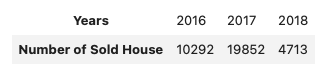

- Day: The houses were sold on 5 different days. As expected, houses were sold mostly on weekends. By far the most house sales
took place on Saturday

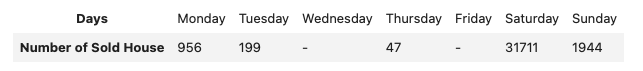

- Month: The distribution of houses according to the months they were sold shows a balanced distributed.
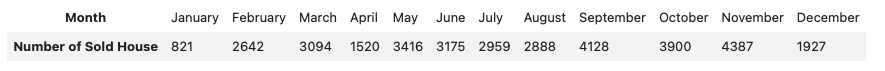

In [10]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')

df_copy['Month_Sold'] = df_copy['Date'].dt.month
df_copy['Year_Sold'] = df_copy['Date'].dt.year
df_copy['Day_Sold'] = df_copy['Date'].dt.day_name()
df_copy['Date'] = df_copy['Date'].astype(str)

cat_cols.append('Day_Sold')

In [11]:
df_copy['Building_Age'] = datetime.now().year - df_copy['YearBuilt']
num_cols.append('Building_Age')

# 2. High Correlated Variables

- The correlation between variables was examined with a threshold value of .65. One of the variables with a correlation above the threshold will be removed from the set.
- There is a strong correlation between Rooms and Bedroom2. "Bedroom2" has many more missing values than "Rooms".
  Therefore 'Bedroom2' is the one to drop.

In [12]:
def find_correlated_features(dataframe, threshold):
    s = dataframe.corr(numeric_only=True).unstack().sort_values(ascending=False)
    return s[s.abs().between(threshold, 1, inclusive='left')].drop_duplicates()

find_correlated_features(df_copy, 0.65)

Bedroom2  Rooms   0.947
dtype: float64

In [13]:
df_copy.drop(['Bedroom2'], inplace=True, axis=1)
num_cols.remove('Bedroom2')

# 3. Duplicated Rows

- As I said before, there is only one identical/duplicated data in the dataset. The last one will be drop.

In [14]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,2017-06-17,15.400,3131.000,3.000,2.000,405.000,226.000,2000.000,Manningham City Council,-37.827,145.168,Eastern Metropolitan,4973.000,6,2017,Saturday,25.000
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,2017-06-17,15.400,3131.000,3.000,2.000,405.000,226.000,2000.000,Manningham City Council,-37.827,145.168,Eastern Metropolitan,4973.000,6,2017,Saturday,25.000


In [15]:
df_copy.drop_duplicates(inplace=True, keep="first")

# 4. Missing Values

- Missing values was examined. The numbers and ratios for each variable can be seen below.
- There are a few things that stand out about missing values.
  - 'Bathroom', 'Landsize', 'BuildingArea' (and 'Bedroom2') their minimum values are 0.
  - Why 'Distance' and 'Postcode' have only 1 and 'CouncilArea, Regionname, Propertycount' have only 3 missing value?

In [16]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                keys=['Number of Missing Values', 'Ratio of Missing Values'],
                axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                    0.000
Address                               0                    0.000
Rooms                                 0                    0.000
Type                                  0                    0.000
Price                              7609                   21.830
Method                                0                    0.000
SellerG                               0                    0.000
Date                                  0                    0.000
Distance                              1                    0.003
Postcode                              1                    0.003
Bathroom                           8226                   23.600
Car                                8728                   25.040
Landsize                          11810                   33.882
BuildingArea                      21115                   60.578
YearBuilt                

Let's change the values that have a very unlikely of being 0 to NA

In [17]:
cols_with_missing_value_0 = ['Bathroom', 'Landsize', 'BuildingArea']
df_copy[cols_with_missing_value_0].eq(0).sum()

Bathroom          46
Landsize        2437
BuildingArea      76
dtype: int64

In [18]:
for col in cols_with_missing_value_0:
    df_copy[col].replace({0: np.nan}, inplace=True)

df_copy[['Bathroom', 'Landsize', 'BuildingArea']].eq(0).sum()

Bathroom        0
Landsize        0
BuildingArea    0
dtype: int64

Let's change the values of the "YearBuilt" variable, there are 9 houses built after the sale and 4 houses built before 1850.

In [19]:
df_copy.loc[(df_copy['YearBuilt'] > df_copy['Year_Sold']) | (df_copy['YearBuilt'] < 1850), 'YearBuilt'] = np.nan

## 4.a. Postcode, Distance

- The only missing data of these two variables is belong to 29438rd data. The 'Suburb' and 'Address' of this data are recorded as 'Fawkner Lot' and '1/3 Brian St' respectively. That was the only data for the suburb 'Fawkner Lot'.
- While reviewing the dataset, I came across two data for the suburb "Fawkner Lot, 1/3 Brain St". However these data were recorded as
"Fawkner" and "3 Brian St". The only difference between these two data and data 29483 is "Date" (sales date).
- As a result, I filled in one of the missing values observed in 'Postcode, Distinct, CouncilArea, Regionname, Propertycount' with the fully registered 'Fawkner' data and changed Suburb variable "Fawkner Lot" to 'Fawkner'.

In [20]:
df_copy[df_copy["Postcode"].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
29483,Fawkner Lot,1/3 Brian St,3,h,616000.000,SP,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,Saturday,NaN


In [21]:
'Fawkner' in df_copy['Suburb'].unique()

True

In [22]:
df_copy.loc[(df_copy["Suburb"] == 'Fawkner') & (df_copy["Address"] == '3 Brian St')]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
11247,Fawkner,3 Brian St,3,h,625000.000,S,Brad,2016-12-10,12.400,3060.000,1.000,2.000,585.000,88.000,1960.000,Hume City Council,-37.695,144.968,Northern Metropolitan,5070.000,12,2016,Saturday,65.000
12756,Fawkner,3 Brian St,3,h,660000.000,S,Brad,2017-04-08,12.400,3060.000,1.000,2.000,585.000,88.000,1960.000,Hume City Council,-37.695,144.968,Northern Metropolitan,5070.000,4,2017,Saturday,65.000


In [23]:
for col, val in zip(df_copy.iloc[11247, :].index, df_copy.iloc[11247, :].values):
    if col in ['Date', 'Month', 'Year']:
        pass
    else:
        df_copy.loc[df_copy.index==29483,col] = val

In [24]:
'Fawkner Lot' in df_copy['Suburb'].unique()

False

## 4.b. RegionArea, CouncilArea, PropertyCount

- All missing values (2) of these three variable belong to 18523rd and 26888th data. These data are respectively "Footscray, 2/16
  Stafford St" and "Camberwell, 2/3 Kingsley St".
- Consequently, I filled in the missing values of "CouncilArea, Regionname, Propertycount" with the values I found from filtering
  "Suburb" and "Address".
- For "Footscray, 2/16 Stafford St" these values are "Maribyrnong City Council, Western Metropolitan, 7570.0" respectively and
  for "Camberwell, 2/3 Kingsley St" the values are "Boroondara City Council, Southern Metropolitan, 8920.0" respectively.

In [25]:
pd.concat([
    df_copy[df_copy['Regionname'].isnull()],
    df_copy[df_copy['CouncilArea'].isnull()],
    df_copy[df_copy['Propertycount'].isnull()]
]).drop_duplicates()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_Sold,Year_Sold,Day_Sold,Building_Age
18523,Footscray,2/16 Stafford St,2,u,710000.000,S,Jas,2017-07-15,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2017,Saturday,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.000,VB,Jellis,2017-11-11,7.700,3124.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2017,Saturday,NaN


In [26]:
footscray_sub_add_filter = (df_copy["Suburb"] == 'Footscray') & (df_copy["Address"] == '2/16 Stafford St')
camberwell_sub_add_filter = (df_copy["Suburb"] == 'Camberwell') & (df_copy["Address"] == '2/3 Kingslet St')

footscray_filter = df_copy["Suburb"]  == 'Footscray'
camberwell_filter = df_copy["Suburb"] == 'Camberwell'

In [27]:
missing_cols =['Regionname', 'CouncilArea', 'Propertycount']

for col in missing_cols:
    df_copy.loc[footscray_sub_add_filter, col] = df_copy.loc[footscray_filter][col].unique()[0]
    df_copy.loc[camberwell_sub_add_filter, col] = df_copy.loc[camberwell_filter][col].unique()[0]

## 4.c. Rest of THe Missing Values

- The rest of the missing values are filled in with the mean of the nearest neighbors using the k-Nearest Neighbors method.
- The KNNImputer predicts the values of a missing value by observing trends in related columns. It then chooses the best
  fit value based on the k-Nearest Neighbors algorithm

In [28]:
knn = KNNImputer(n_neighbors=5)
df_copy[num_cols] = knn.fit_transform(df_copy[num_cols])

## 5. Outlier Handling

Simply, a z-score (standard score) gives you an idea of how far from the mean a data point is. Z-score is measured in terms of
standard deviations from the mean. It is calculated by subtracting the population mean from an individual raw score and then
dividing the difference by the population standard deviation.

    - 68% of the data points lie between +/-1 standard deviation.
    - 95% of the data points lie between +/-2 standard deviation.
    - 99.7% of the data points lie between +/-3 standard deviation.
    
    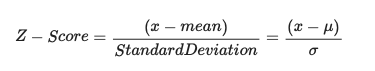

There are some different ways to detect outliers when using z-score. The two ways below do the same thing, but how they do it is
different.

- Detection of outliers using upper limit and lower limit using 3 standard deviations.
- Using z-score (from -3 to 3) to detect outliers.

### Z-Score

In [29]:
def outlier_thresholds(dataframe, variable, method, low_quantile=0.10, up_quantile=0.90):
    if method =='iqr':
        quantile_one = dataframe[variable].quantile(low_quantile)
        quantile_three = dataframe[variable].quantile(up_quantile)
        interquantile_range = quantile_three - quantile_one
        up_limit = quantile_three + 1.5 * interquantile_range
        low_limit = quantile_one - 1.5 * interquantile_range
    elif method == 'z-score':
        up_limit = dataframe[variable].mean() + 3 * dataframe[variable].std()
        low_limit = dataframe[variable].mean() - 3 * dataframe[variable].std()
    else:
        pass
    return low_limit, up_limit

In [30]:
def check_outlier(dataframe, col_name, method):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, method)
    outliers = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    if dataframe[outliers].any(axis=None):
        return f'{True} {dataframe[col_name][outliers].count()}'
    else:
        return False

In [31]:
for col in num_cols:
    print(col, check_outlier(df_copy, col, 'z-score'))

Rooms True 269
Price True 604
Distance True 792
Postcode True 558
Bathroom True 377
Car True 360
Landsize True 71
BuildingArea True 25
YearBuilt True 47
Lattitude True 386
Longtitude True 393
Propertycount True 844
Building_Age True 51


In [32]:
def replace_with_thresholds(dataframe, variable, method, plot=False):
    dataframe_copy = dataframe.copy()

    low_limit, up_limit = outlier_thresholds(dataframe, variable, method)
    dataframe.loc[(dataframe[variable] < low_limit), variable]

In [38]:
import numpy as np
import pandas as pd

def outlier_thresholds(dataframe, variable, method="iqr",
                       low_quantile=0.25, up_quantile=0.75, z=3):
    s = dataframe[variable]

    # if column is not numeric, just skip
    if not np.issubdtype(s.dtype, np.number):
        return None, None

    if method == "iqr":
        q1 = s.quantile(low_quantile)
        q3 = s.quantile(up_quantile)
        iqr = q3 - q1
        low_limit = q1 - 1.5 * iqr
        up_limit = q3 + 1.5 * iqr

    elif method == "z_score":
        mean = s.mean()
        std = s.std()

        # if std is zero or NaN, we can't compute meaningful z-scores
        if std == 0 or pd.isna(std):
            return None, None

        low_limit = mean - z * std
        up_limit = mean + z * std

    else:
        # unsupported method
        return None, None

    return low_limit, up_limit


In [39]:
for col in num_cols:
    print(col, replace_with_thresholds(df_copy, col, 'z_score'))

Rooms None
Price None
Distance None
Postcode None
Bathroom None
Car None
Landsize None
BuildingArea None
YearBuilt None
Lattitude None
Longtitude None
Propertycount None
Building_Age None


### 6. Encoding

- The variable "Address", which has a high cardinality and a unique value of 34009 (34008 due to the Fawkner Lot), was removed
  from the dataset instead of encoding.

In [41]:
df_copy.drop(['Address', 'Date', 'YearBuilt'], inplace=True, axis=1)
cat_cols.remove('Address')
cat_cols.remove('Date')
num_cols.remove('YearBuilt')

In [42]:
for col in cat_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])

# Model Building

- After handling missing and outlier, extracting of new features and encoding all features, long story short, after Feature
  Engineering, it is time to build and train machine learning models.
- This section contains:
  1. Model Building for Baseline Score
  2. Visual Comparing of Model Performances
  3. Hyper-parameter Optimization
  4. Feature Importance Visualization of Best Model
     - Feature Importance
     - Permutation Importance
  5. Building and Saving Best Model

In [43]:
X = df_copy.drop(["Price"], axis=1)
y = df_copy["Price"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 1. Baseline Score

- After splitting the data, 12 models were trained with the train data to compare their performance.
- The performance metrics (R2, MAE, MSE, RMSE) append a new dataframe (df_scores) to make things easier.
- The result shows us that Ensemble Models (LGBM, XGB, ...) have the best performance.

In [45]:
models = {'Lasso': {'model': Lasso()},
          'LinearRegression': {'model': LinearRegression()},
          'Ridge': {'model': Ridge()},
          'ElasticNet': {'model': ElasticNet()},
          'KNeighborsRegressor': {'model': KNeighborsRegressor()},
          'RandomForestRegressor': {'model': RandomForestRegressor()},
          'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
          'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5,
                                                           learning_rate = 1.2,
                                                           loss= 'exponential',
                                                           random_state = 42)},
          'DecisionTreeRegressor': {'model': DecisionTreeRegressor(max_depth=9,
                                                                   min_samples_split=4,
                                                                   random_state=1)},
          'XGB': {'model': XGBRegressor(random_state=17, eval_metric='logloss')},
          'LightGBM': {'model': LGBMRegressor(random_state=17, verbose=1)},
          'CatBoost': {'model': CatBoostRegressor(verbose=False)}}

In [46]:
df_scores = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

for name, regressor in models.items():
    print('Running: ', name)
    regressor['model'].fit(X_train, y_train)
    y_pred = regressor['model'].predict(X_test)
    y_train_pred = regressor['model'].predict(X_train)

    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_test = metrics.r2_score(y_test, y_pred)

    mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    r2_train = metrics.r2_score(y_train, y_train_pred)

    print('\n'.join([f'MAE  TEST:   {mae_test}',
                     f'MSE  TEST:   {mse_test}',
                     f'RMSE TEST:   {rmse_test}',
                     f'R2   TEST:   {r2_test}\n']))
    
    print('\n'.join([f'MAE  TRAIN:  {mae_train}',
                     f'MSE  TRAIN:  {mse_train}',
                     f'RMSE TRAIN:  {rmse_train}',
                     f'R2   TRAIN:  {r2_train}\n']))
    
    print("*************************\n")

    df_scores = df_scores._append({"Model": name,
                                   "MAE": mae_test,
                                   "MSE": mse_test,
                                   "RMSE": rmse_test,
                                   "R2": r2_test},
                                 ignore_index=True)

Running:  Lasso
MAE  TEST:   254327.62559420188
MSE  TEST:   121415604486.51671
RMSE TEST:   348447.4199739707
R2   TEST:   0.6379517799247172

MAE  TRAIN:  253022.11477379073
MSE  TRAIN:  120205010622.28397
RMSE TRAIN:  346705.94258288096
R2   TRAIN:  0.6508149479832488

*************************

Running:  LinearRegression
MAE  TEST:   254328.2643479518
MSE  TEST:   121415666377.48575
RMSE TEST:   348447.5087835839
R2   TEST:   0.6379515953725317

MAE  TRAIN:  253022.67031512153
MSE  TRAIN:  120205010388.7657
RMSE TRAIN:  346705.94224611396
R2   TRAIN:  0.6508149486615988

*************************

Running:  Ridge
MAE  TEST:   254315.90832469225
MSE  TEST:   121415744136.17496
RMSE TEST:   348447.62036233646
R2   TEST:   0.6379513635045181

MAE  TRAIN:  253011.43555254771
MSE  TRAIN:  120205193422.52332
RMSE TRAIN:  346706.20620710455
R2   TRAIN:  0.6508144169645269

*************************

Running:  ElasticNet
MAE  TEST:   273108.10419443797
MSE  TEST:   143677010804.6434
RMSE T

In [47]:
df_scores

,Model,MAE,MSE,RMSE,R2
0,Lasso,254327.626,121415604486.517,348447.420,0.638
1,LinearRegression,254328.264,121415666377.486,348447.509,0.638
2,Ridge,254315.908,121415744136.175,348447.620,0.638
3,ElasticNet,273108.104,143677010804.643,379047.505,0.572
4,KNeighborsRegressor,248955.207,141049220629.024,375565.202,0.579
5,RandomForestRegressor,157679.273,57794246018.156,240404.339,0.828
6,GradientBoostingRegressor,185378.579,74364616898.320,272698.766,0.778
7,AdaBoostRegressor,286511.409,137344189875.263,370599.770,0.590
8,DecisionTreeRegressor,196261.012,86350650488.017,293854.812,0.743
9,XGB,163192.416,59553629520.867,244036.123,0.822


## 2. Compare Models

- Model performance metrics are visualized for better understanding and interpretation
- Based on these results, several models will be selected for hyperparameter tuning.

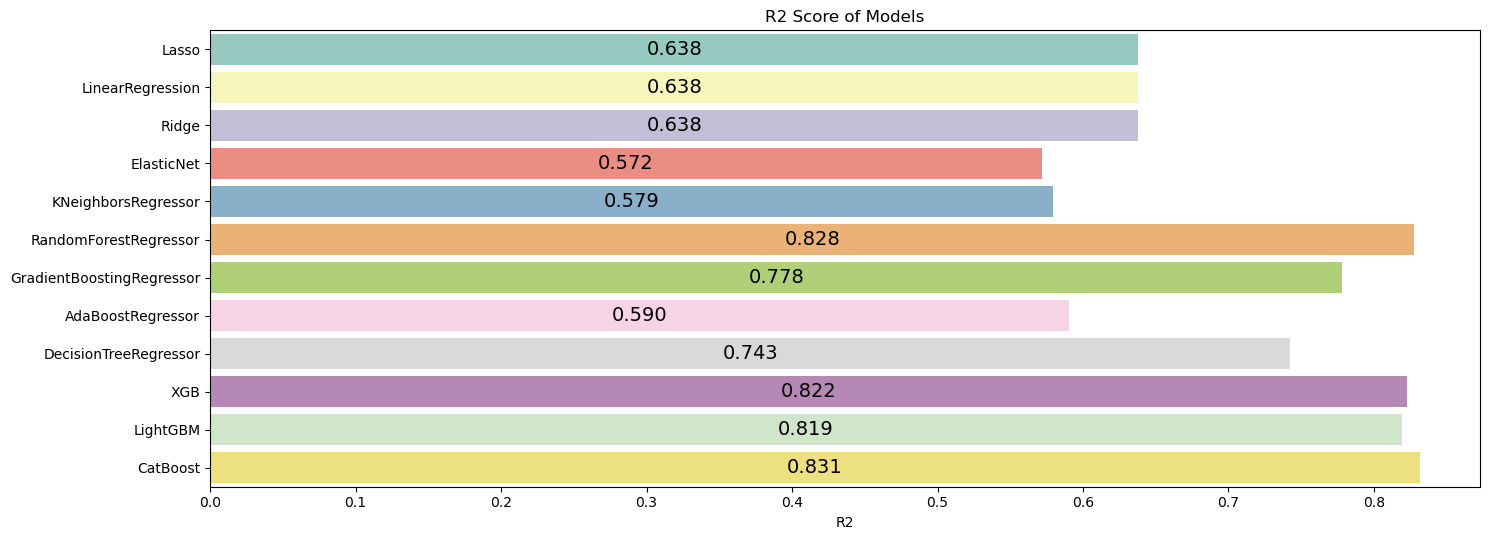

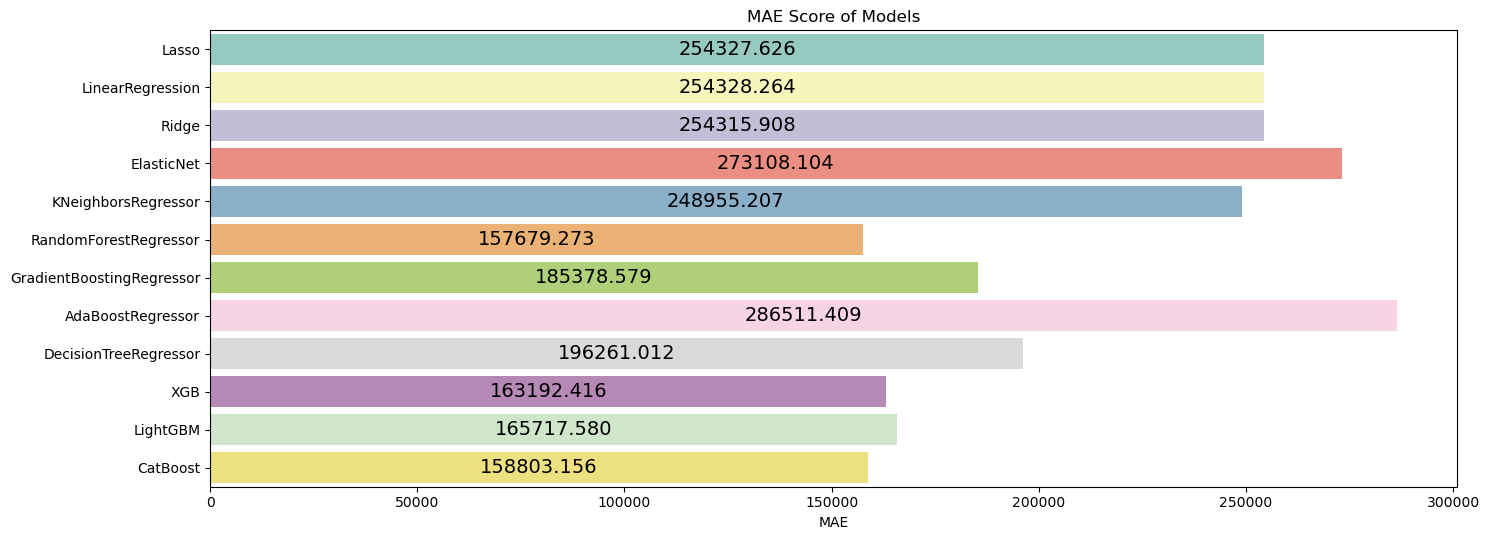

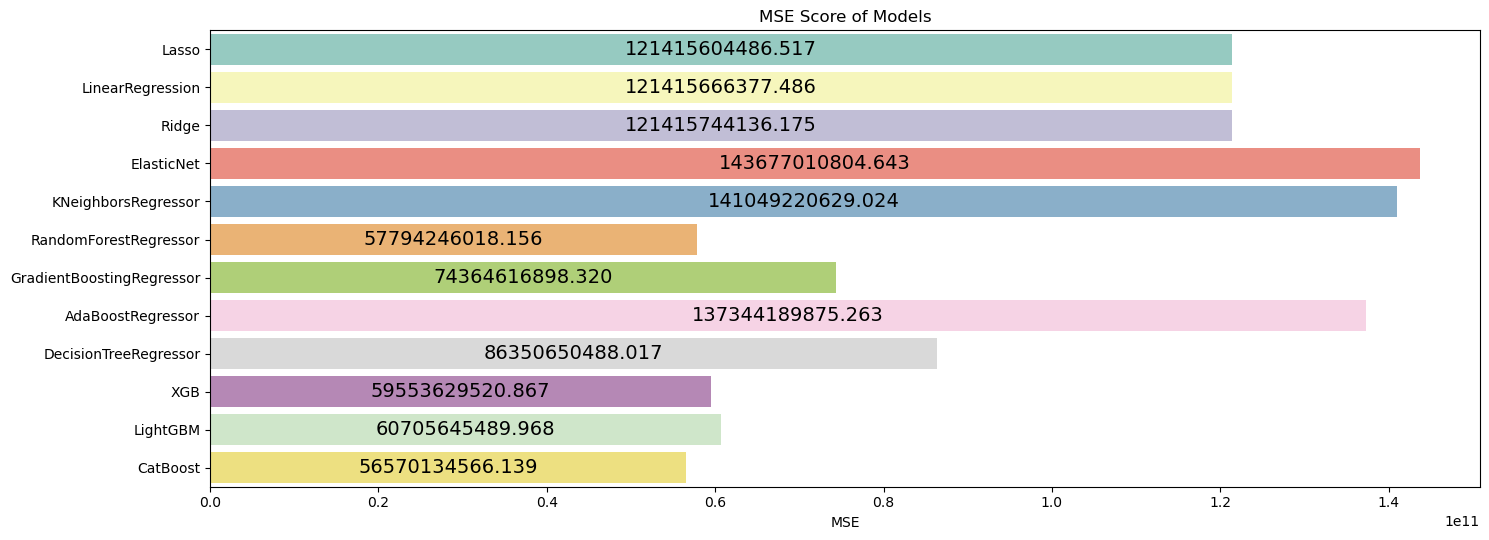

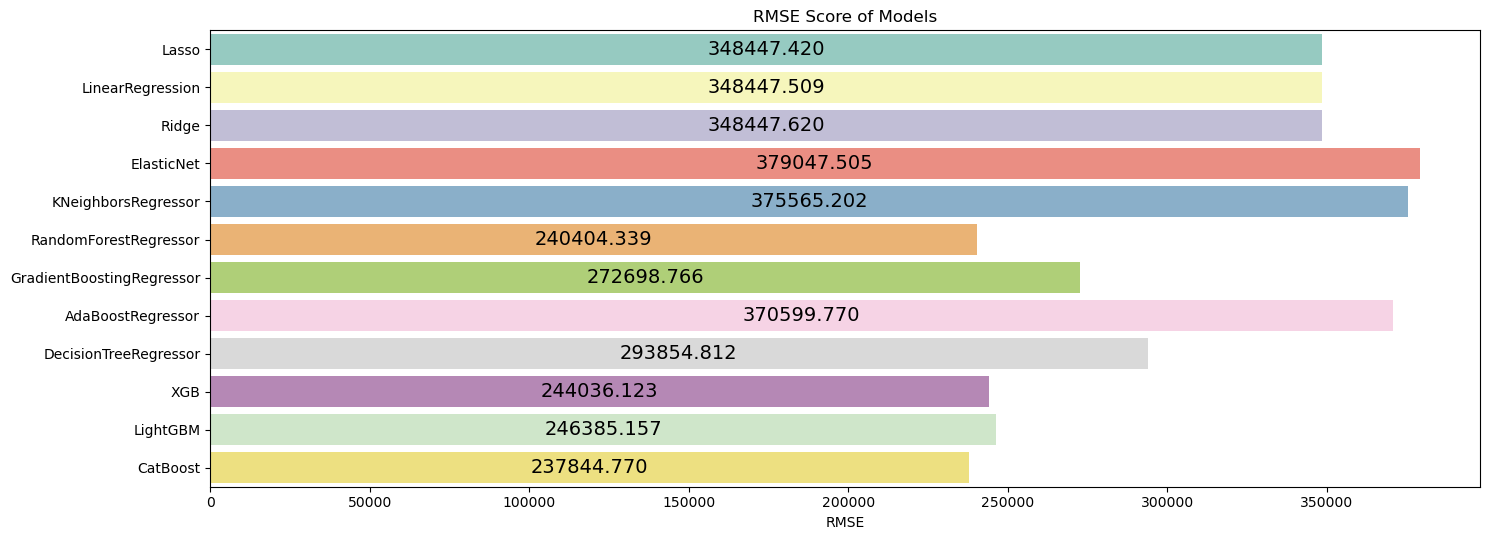

In [50]:
for col in ['R2', 'MAE', 'MSE', 'RMSE']:
    plt.figure(figsize=(15, 5.5))
    ax = sns.barplot(data=df_scores, x=col, y='Model', palette='Set3')

    for container in ax.containers:
        ax.bar_label(container,
                     fmt='{:1.3f}',
                     fontsize=14,
                     label_type='center')

    ax.set(ylabel='')
    plt.title(f'{col} Score of Models')
    plt.tight_layout()
    plt.show()


## 3. Hyper Paramter Optimization

- Four model have been hosen for hyperaparameter tuning. These are:
  - LGBM
  - XGB
  - CatBoost
  - Random Forest

- After (shallow) hyperparameter tuning wth GridSearchCV (may give better reuslts with Optuna), CatBoost has better result than others.

In [56]:
# ===============================
# Imports
# ===============================
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# ===============================
# 1. Base models (for baseline CV scores)
# ===============================

BASE_MODELS = [
    ("Lasso", Lasso()),
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge()),
    ("ElasticNet", ElasticNet()),
    ("KNN", KNeighborsRegressor()),
    ("RandomForest", RandomForestRegressor(random_state=17)),
    ("GradientBoosting", GradientBoostingRegressor(random_state=17)),
    ("AdaBoost", AdaBoostRegressor(
        n_estimators=5,
        learning_rate=1.2,
        loss="exponential",
        random_state=2
    )),
    ("DecisionTree", DecisionTreeRegressor(
        max_depth=9,              # ✅ fixed: max_depth (not max_deplt)
        min_samples_split=4,
        random_state=1
    )),
    ("XGB", XGBRegressor(
        random_state=17,
        objective="reg:squarederror",
        eval_metric="rmse"
    )),
    ("LightGBM", LGBMRegressor(random_state=17)),
    ("CatBoost", CatBoostRegressor(random_state=17, verbose=False)),
]


def base_models(X, y, scoring="r2", cv=5):
    print("\nBase Models (Cross-Validation)")
    for name, model in BASE_MODELS:
        cv_results = cross_validate(
            model, X, y,
            cv=cv,
            scoring=scoring,
            n_jobs=-1
        )
        mean_score = cv_results["test_score"].mean()
        print(f"{name}: {scoring} = {mean_score:.4f}")


# ===============================
# 2. Models + Param Grids for Hyperparameter Tuning
# ===============================

MODEL_PARAM_GRIDS = [
    ("Lasso", Lasso(), {
        "alpha": [0.01, 0.1, 1, 10]
    }),

    ("Ridge", Ridge(), {
        "alpha": [0.01, 0.1, 1, 10]
    }),

    ("ElasticNet", ElasticNet(), {
        "alpha": [0.01, 0.1, 1, 10],
        "l1_ratio": [0.1, 0.5, 0.9]
    }),

    ("KNN", KNeighborsRegressor(), {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "p": [1, 2]             # 1 = Manhattan, 2 = Euclidean
    }),

    ("RandomForest", RandomForestRegressor(random_state=17), {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    }),

    ("GradientBoosting", GradientBoostingRegressor(random_state=17), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    }),

    ("AdaBoost", AdaBoostRegressor(random_state=2), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    }),

    ("DecisionTree", DecisionTreeRegressor(random_state=1), {
        "max_depth": [3, 5, 9, None],
        "min_samples_split": [2, 4, 10]
    }),

    ("XGB", XGBRegressor(
        objective="reg:squarederror",
        random_state=17,
        eval_metric="rmse"
    ), {
        "n_estimators": [200, 400],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.7, 1.0]
    }),

    ("LightGBM", LGBMRegressor(random_state=17), {
        "n_estimators": [200, 400],
        "learning_rate": [0.01, 0.1],
        "num_leaves": [31, 63]
    }),

    ("CatBoost", CatBoostRegressor(random_state=17, verbose=False), {
        "depth": [4, 6, 8],
        "learning_rate": [0.01, 0.05, 0.1],
        "n_estimators": [200, 400]
    }),
]


# ===============================
# 3. Hyperparameter Optimization
# ===============================

def hyperparameter_optimization(X, y, cv=5, scoring="r2"):
    print("\nHyperparameter Optimization...")
    best_models = {}

    for name, regressor, params in MODEL_PARAM_GRIDS:
        print(f"\n########## {name} ##########")

        # Before tuning
        cv_results = cross_validate(
            regressor, X, y,
            cv=cv,
            scoring=scoring,
            n_jobs=-1
        )
        print(f"{scoring} (Before): {cv_results['test_score'].mean():.4f}")

        # GridSearchCV
        gs = GridSearchCV(
            regressor,
            param_grid=params,
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            verbose=0
        )
        gs.fit(X, y)

        best_model = gs.best_estimator_

        # After tuning
        cv_results = cross_validate(
            best_model, X, y,
            cv=cv,
            scoring=scoring,
            n_jobs=-1
        )
        print(f"{scoring} (After):  {cv_results['test_score'].mean():.4f}")
        print(f"{name} best params: {gs.best_params_}")

        best_models[name] = best_model

    return best_models


# ===============================
# 4. Wrapper to Run Everything
# ===============================

def fit_models(X, y, scoring="r2", cv=5):
    # 1) See baseline performance
    base_models(X, y, scoring=scoring, cv=cv)

    # 2) Run hyperparameter search
    best_models = hyperparameter_optimization(X, y, cv=cv, scoring=scoring)

    return best_models


# ===============================
# 5. Call with your train data
# ===============================

# Assuming you already have:
# X_train, X_test, y_train, y_test

best_models = fit_models(X_train, y_train)



Base Models (Cross-Validation)
Lasso: r2 = 0.6500
LinearRegression: r2 = 0.6500
Ridge: r2 = 0.6500
ElasticNet: r2 = 0.5873
KNN: r2 = 0.5863
RandomForest: r2 = 0.8216
GradientBoosting: r2 = 0.7854
AdaBoost: r2 = 0.5984
DecisionTree: r2 = 0.7467
XGB: r2 = 0.8180
LightGBM: r2 = 0.8225
CatBoost: r2 = 0.8317

Hyperparameter Optimization...

########## Lasso ##########
r2 (Before): 0.6500
r2 (After):  0.6500
Lasso best params: {'alpha': 10}

########## Ridge ##########
r2 (Before): 0.6500
r2 (After):  0.6500
Ridge best params: {'alpha': 0.1}

########## ElasticNet ##########
r2 (Before): 0.5873
r2 (After):  0.6497
ElasticNet best params: {'alpha': 0.01, 'l1_ratio': 0.9}

########## KNN ##########
r2 (Before): 0.5863
r2 (After):  0.6616
KNN best params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

########## RandomForest ##########
r2 (Before): 0.8216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true

## 4. Importance Visualization of Best Model

- For the next steps, the best model according to R2 score selected after hyperparameter tuning which is CatBoost
- Feature Importance and Permutation Importance for CatBoost can be seen in the plot below.

In [57]:
final_model_catboost = best_models['CatBoost'].fit(X_train, y_train)

In [59]:
perm = PermutationImportance(final_model_catboost, random_state=42, n_iter=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3453 ± 0.0119,Distance
0.2367 ± 0.0142,Rooms
0.1298 ± 0.0046,Type
0.0996 ± 0.0068,Postcode
0.0948 ± 0.0072,Lattitude
0.0638 ± 0.0048,Longtitude
0.0536 ± 0.0056,Landsize
0.0246 ± 0.0020,CouncilArea
0.0198 ± 0.0028,Bathroom
0.0195 ± 0.0028,BuildingArea


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 22307, number of used features: 20
[LightGBM] [Info] Start training from score 1067116.132506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 22307, number of used features: 20
[LightGBM] [Info] Start training from score 1068852.177663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

In [63]:
	
def plot_importance(model, type, features=None, X_test=None, y_test=None, save=False):
    if type == 'feature_importance':
        df_imp = pd.DataFrame({'Value': model.feature_importances_, 
                               'Feature': features.columns})
        
        plt.figure(figsize=(15, 6))
        sns.set(font_scale=1)
        ax = sns.barplot(x="Feature", y="Value", 
                         data=df_imp.sort_values(by="Value", ascending=False),
                         palette='Set3')

        for container in ax.containers:
            ax.bar_label(container,  fmt="{:1.2f}", fontsize=12)
        plt.title('Feature Importance')
        plt.xticks(rotation=30)
        plt.tight_layout()
        if save:
            plt.savefig("feature_importance.png")
        plt.show()
        
    elif type == 'permutation_importance' and features is None:
        model_copy = model.copy()
        perm = PermutationImportance(model_copy, random_state=42, n_iter=10).fit(X_test, y_test)
        df_imp = pd.DataFrame({'Feature': X_test.columns.tolist(),
                               'Value': perm.feature_importances_, 
                               'Std': perm.feature_importances_std_,})
        
        plt.figure(figsize=(15, 6))
        sns.set(font_scale=1)
        ax = sns.barplot(x="Feature", y="Value", 
                         data=df_imp.sort_values(by="Value", ascending=False),
                         palette='Set3')

        for container in ax.containers:
            ax.bar_label(container,  fmt="{:1.4f}", fontsize=11)
        plt.title('Permutation Importance (test set)')
        plt.xticks(rotation=30)
        plt.tight_layout()
        if save:
            plt.savefig("permutation_importance.png")
        plt.show()
        
    else:
        return f'Unsupported importance type.'

### 4.a. Feature Importance

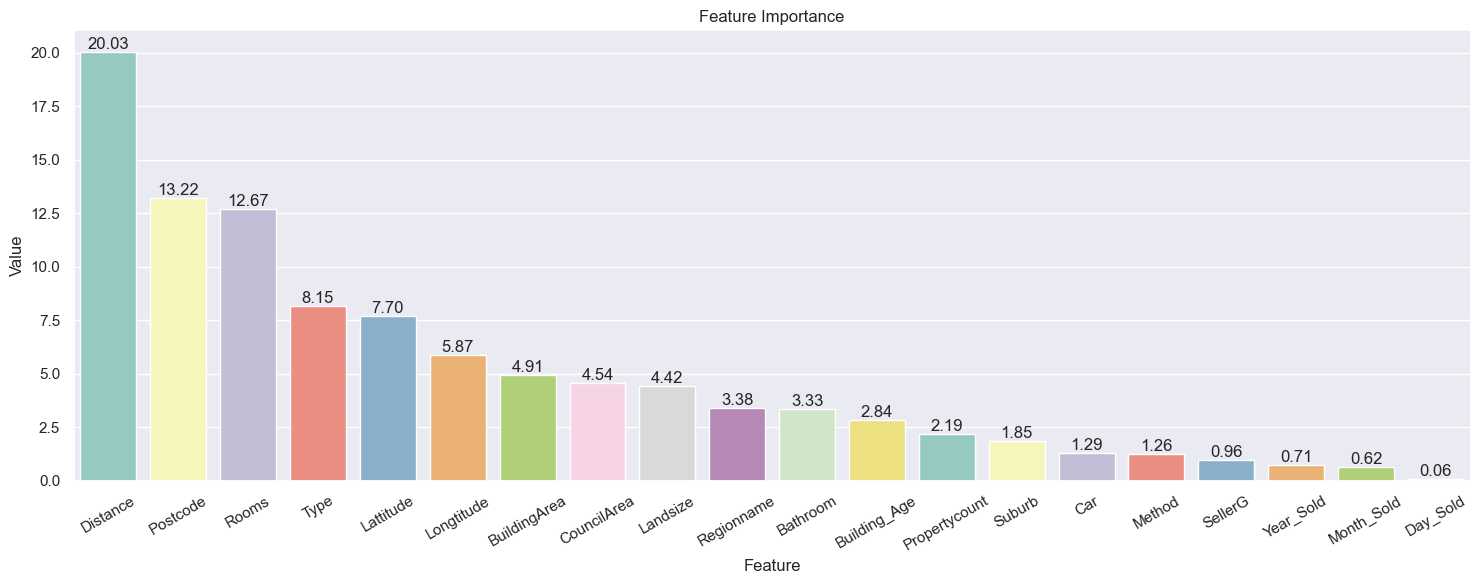

In [64]:
plot_importance(final_model_catboost, 'feature_importance', X)

### 4.b. Permutation Importance

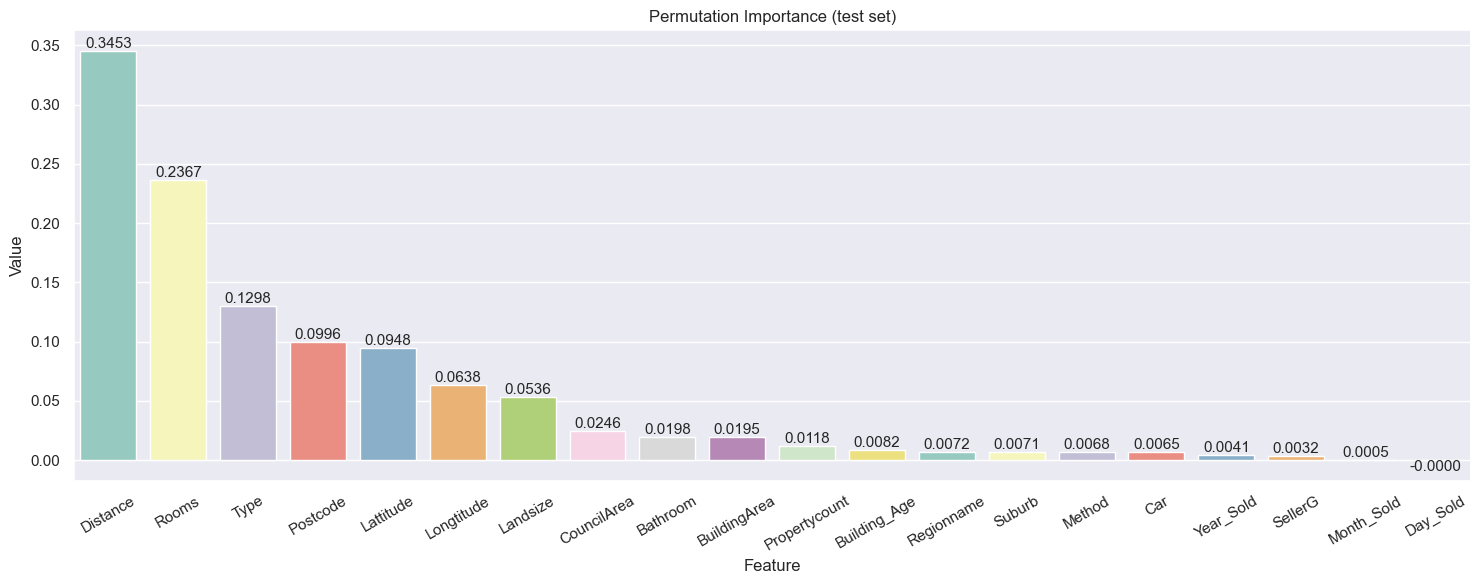

In [65]:
plot_importance(final_model_catboost, type='permutation_importance', X_test=X_test, y_test=y_test)

### 5. Final Model

- Performance metrics of the best model were calculated.
- At last but not least, the best model CatBoost was trained with the entire dataset and saved for further work.

In [67]:
scores_r2 = cross_val_score(final_model_catboost, X, y, cv=5, scoring='r2')
print(f"R2 : {np.mean(scores_r2):.4f} (+/- {np.std(scores_r2):.4f})")

scores_mae = -cross_val_score(final_model_catboost, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"MAE  {np.mean(scores_mae):.4f} (+/- {np.std(scores_mae):.4f})")

scores_mse = -cross_val_score(final_model_catboost, X, y, cv=5, scoring ='neg_mean_squared_error')
print(f"MSE: {np.mean(scores_mse):.4f} (+/- {np.std(scores_mse):.4f})")

scores_rmse = np.sqrt(scores_mse)
print(f"RMSE: {np.mean(scores_rmse):.4f} (+/- {np.std(scores_rmse):.4f})")

R2 : 0.8178 (+/- 0.0166)
MAE  165931.2139 (+/- 17125.7875)
MSE: 61168294639.1415 (+/- 10347591367.5364)
RMSE: 246489.4370 (+/- 20279.3511)


In [68]:
final_model_catboost.fit(X, y)

joblib.dump(final_model_catboost, 'final_model_catboost.pkl')

['final_model_catboost.pkl']

In [72]:
# permutation importances
importances = perm.feature_importances_   # or perm.feature_importances_ / perm.results_ depending how you built it
threshold = 0.01

mask = importances >= threshold

# if X is a DataFrame
X_trans = X.loc[:, mask]

# (If X is a NumPy array instead, use:)
# X_trans = X[:, mask]

print("Selected features:")
print(list(X.columns[mask]))
print("X_trans shape:", X_trans.shape)

Selected features:
['Rooms', 'Type', 'Distance', 'Postcode', 'Bathroom', 'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']
X_trans shape: (34856, 11)


In [73]:
final_model_catboost.fit(X_trans, y)
scores_r2 = cross_val_score(final_model_catboost, X_trans, y, cv=5, scoring='r2')
print(f"R2 : {np.mean(scores_r2):.4f} (+/- {np.std(scores_r2):.4f})")

scores_mae = -cross_val_score(final_model_catboost, X_trans, y, cv=5, scoring='neg_mean_absolute_error')
print(f"MAE: {np.mean(scores_mae):.4f} (+/- {np.std(scores_mae):.4f})")

scores_mse = -cross_val_score(final_model_catboost, X_trans, y, cv=5, scoring='neg_mean_squared_error')
print(f"MSE: {np.mean(scores_mse):.4f} (+/- {np.std(scores_mse):.4f})")

scores_rmse = np.sqrt(scores_mse)
print(f"RMSE: {np.mean(scores_rmse):.4f} (+/- {np.std(scores_rmse):.4f})")

R2 : 0.8142 (+/- 0.0211)
MAE: 168209.2531 (+/- 20025.1553)
MSE: 62369739827.7498 (+/- 11202323932.8135)
RMSE: 248779.3043 (+/- 21876.8735)
